In [3]:
# import libraries
import os
import re
import sys
# import cv2
from multi_bary_plot import GenBary
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
from PIL import Image
import pandas as pd
import numpy as np

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
# import the 'branching process' modules
import sys
sys.path.append("../branching_model/")
from branching_model.Agent import * 

In [6]:
current_dir = os.getcwd()
print(current_dir)

/Users/cetienne/Desktop/Moffitt_IMOworkshop2023/branching_model/branching_model


In [102]:
# load the data
livecells_mutations_df = pd.read_csv('../data/simulations_recordings/live_cell_mutations.csv', sep = ',')
livecells_mutations_df.head()

,time,clone_id,parent_id,mutation_size,vaf,S,R1,R2,R3,T1,T2,T3
0,0,0,-1,1,0.5,0.217031,0.305889,0.238681,0.238399,0.0,0.0,0.0
1,1,0,-1,1,0.5,0.218578,0.305054,0.238400,0.237968,0.0,0.0,0.0
2,2,0,-1,1,0.5,0.220144,0.304211,0.238115,0.237531,0.0,0.0,0.0
3,3,0,-1,1,0.5,0.221731,0.303359,0.237825,0.237086,0.0,0.0,0.0
4,4,0,-1,1,0.5,0.223338,0.302499,0.237529,0.236633,0.0,0.0,0.0


In [110]:
my_cols = ['time', 'parent_id', 'clone_id', 'vaf', 'S', 'R1', 'R2', 'R3']
vaf_df = livecells_mutations_df.loc[:, my_cols].groupby('time')
# vaf_df.groupby()
vaf_df.head()

,time,parent_id,clone_id,vaf,S,R1,R2,R3
0,0,-1,0,0.500000,0.217031,0.305889,0.238681,0.238399
1,1,-1,0,0.500000,0.218578,0.305054,0.238400,0.237968
2,2,-1,0,0.500000,0.220144,0.304211,0.238115,0.237531
3,3,-1,0,0.500000,0.221731,0.303359,0.237825,0.237086
4,4,-1,0,0.500000,0.223338,0.302499,0.237529,0.236633
...,...,...,...,...,...,...,...,...
502,53,-1,0,0.500000,0.490078,0.275293,0.125741,0.108888
503,53,0,1,0.285714,0.647873,0.135128,0.176208,0.040791
504,53,0,2,0.142857,0.375238,0.364037,0.011993,0.248733
505,53,1,3,0.226190,0.788097,0.052985,0.157899,0.001019


/var/folders/88/2ss_s5vn72bfpx6k5wvhc5nh0000gq/T/ipykernel_4907/1874600706.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.displot(data=livecells_mutations_df, x="vaf", kind = 'kde', hue='time', palette = green_palette)


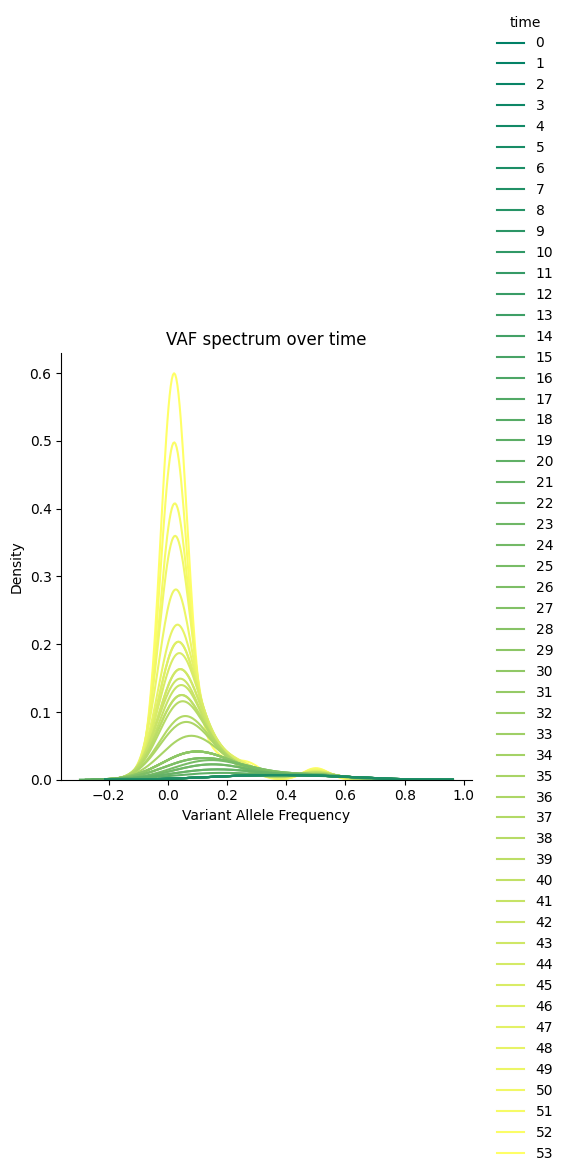

<Figure size 640x480 with 0 Axes>

In [116]:
# Define a green color palette
green_palette = plt.get_cmap('summer')
# import matplotlib as mpl

# fig, ax = plt.subplots()
ax = sns.displot(data=livecells_mutations_df, x="vaf", kind = 'kde', hue='time', palette = green_palette)
# sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

# ax._legend.add(loc='left')
plt.title('VAF spectrum over time')
plt.xlabel('Variant Allele Frequency')
# plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)

plt.show()
plt.savefig('vaf_perclone_placeholder.png', dpi=1000, bbox_inches = "tight")
# plt.close()